In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from data_preprocessing_final import cleaning
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

In [2]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col = 0)

In [3]:
housing = cleaning(housing)
housing = housing[~housing.PID.isin([904300150, 535383070, 905426030, 528142130])]

In [4]:
housing.head()

,PID,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleCondition,Bsmt_Unfin_Ratio,TotalLivArea
1,909176150,126000,30,RL,68.516053,7890,Reg,Lvl,Corner,Gtl,...,0,0,0,166,No_Fence,3,2010,Normal,0.721963,1712.0
2,905476230,139500,120,RL,42.000000,4235,Reg,Lvl,Inside,Gtl,...,105,0,0,0,No_Fence,2,2009,Normal,0.099142,2098.0
3,911128020,124900,30,C (all),60.000000,6060,Reg,Lvl,Inside,Gtl,...,0,42,86,0,No_Fence,11,2007,Normal,0.119474,1838.0
4,535377150,114000,70,RL,80.000000,8146,Reg,Lvl,Corner,Gtl,...,0,168,0,111,No_Fence,5,2009,Normal,1.000000,1444.0
5,534177230,227000,60,RL,70.000000,8400,Reg,Lvl,Inside,Gtl,...,45,0,0,0,No_Fence,11,2009,Normal,0.206173,2475.0


In [5]:
def ord_enc_func(housing):
    housing = housing.reset_index() #duplicated index values in csv need to reset
    housing = housing.drop('index', axis = 1) # drop original index with duplicates
    price = housing['SalePrice'] # Create Y Variable
    
    housing_num = housing.select_dtypes(['int64', 'float64']) # Select numeric data types
    housing_num = housing_num.drop(['PID', 'SalePrice', 'MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold'], axis = 1)
    
    category = housing.select_dtypes('object') #Select all 'object' data types  which are all categorical
    housing_num2cat = housing[['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']]
    category = pd.concat([category.astype(str), housing_num2cat.astype(str)], axis = 1) #Add all categorical features to dataframe to be encoded
    
    oe = OrdinalEncoder()
    cat_ord_enc = oe.fit_transform(category)
    cat_ord_enc = pd.DataFrame(cat_ord_enc, columns = category.columns)
    full_oe_data = pd.concat([housing_num, cat_ord_enc], axis = 1) #Concatenate encoded data and numeric data
    
    return full_oe_data, pd.DataFrame(price)

In [6]:
X,y = ord_enc_func(housing)

In [7]:
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,...,GarageFinish,GarageQual,PavedDrive,Fence,SaleCondition,MSSubClass,OverallQual,OverallCond,MoSold,YrSold
0,68.516053,7890,1939,1950,0.0,2,2,1,1939.0,399.0,...,3.0,5.0,2.0,4.0,4.0,6.0,6.0,5.0,5.0,4.0
1,42.000000,4235,1984,1984,149.0,2,3,0,1984.0,266.0,...,0.0,5.0,2.0,4.0,4.0,0.0,5.0,4.0,4.0,3.0
2,60.000000,6060,1930,2007,0.0,2,3,0,1930.0,216.0,...,3.0,5.0,0.0,4.0,4.0,6.0,5.0,8.0,2.0,1.0
3,80.000000,8146,1900,2003,0.0,2,4,0,1940.0,281.0,...,3.0,5.0,0.0,4.0,4.0,11.0,4.0,7.0,7.0,3.0
4,70.000000,8400,2001,2001,0.0,3,3,0,2001.0,528.0,...,0.0,5.0,2.0,4.0,4.0,10.0,8.0,5.0,2.0,3.0


In [8]:
y.head()

,SalePrice
0,126000
1,139500
2,124900
3,114000
4,227000


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,...,GarageFinish,GarageQual,PavedDrive,Fence,SaleCondition,MSSubClass,OverallQual,OverallCond,MoSold,YrSold
1676,63.000000,4000,1930,1995,0.0,2,3,1,1930.0,216.0,...,3.0,5.0,2.0,2.0,4.0,11.0,7.0,7.0,8.0,1.0
2444,68.516053,7050,2001,2001,0.0,3,4,1,2001.0,650.0,...,0.0,5.0,2.0,4.0,4.0,10.0,7.0,4.0,7.0,1.0
46,59.000000,11796,2004,2005,0.0,4,4,1,2004.0,434.0,...,0.0,5.0,2.0,4.0,4.0,10.0,7.0,4.0,9.0,1.0
1596,48.000000,10635,2003,2003,171.0,3,5,1,2003.0,502.0,...,0.0,5.0,2.0,4.0,4.0,5.0,8.0,4.0,7.0,4.0
1077,60.000000,10560,1922,1994,0.0,2,4,0,1970.0,624.0,...,3.0,5.0,2.0,4.0,4.0,11.0,6.0,6.0,8.0,4.0


In [11]:
y_train.head()

,SalePrice
1676,148500
2444,226000
46,215000
1596,232000
1077,140750


In [12]:
# Setting up Parameters

gbr = GradientBoostingRegressor()
parameters = {
    "n_estimators":[850, 900, 950, 1000],
    "max_depth":[4, 5, 6],
    "learning_rate":[0.005, 0.01, 0.025, 0.05, 0.075],
    "subsample":[0.4, 0.6, 0.7, 0.8, 0.9],
    "max_features":[7, 8]
}

grid_search = GridSearchCV(estimator = gbr, param_grid = parameters, n_jobs = -1, cv = 5)

In [13]:
grid_search.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01, 0.025, 0.05, 0.075],
                         'max_depth': [4, 5, 6], 'max_features': [7, 8],
                         'n_estimators': [850, 900, 950, 1000],
                         'subsample': [0.4, 0.6, 0.7, 0.8, 0.9]})>

In [14]:
grid_search.fit(X_train, y_train)

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.01, 0.025, 0.05, 0.075],
                         'max_depth': [4, 5, 6], 'max_features': [7, 8],
                         'n_estimators': [850, 900, 950, 1000],
                         'subsample': [0.4, 0.6, 0.7, 0.8, 0.9]})

In [15]:
# Getting the best estimator

beast = grid_search.best_estimator_
beast

GradientBoostingRegressor(learning_rate=0.025, max_depth=5, max_features=8,
                          n_estimators=1000, subsample=0.8)

In [16]:
beast.score(X_train, y_train)

0.9950415525428723

### NEW HIGH SCORE???

In [17]:
beast.score(X_test, y_test)

0.9304363245891858

In [101]:
beast.feature_importances_

array([1.23510273e-02, 2.46883847e-02, 5.02318615e-02, 1.62543530e-02,
       1.69080330e-02, 2.25025470e-03, 1.03148841e-02, 1.17879298e-02,
       9.32478363e-03, 3.60672591e-02, 8.44200769e-03, 1.30392554e-02,
       2.47384681e-03, 2.73312888e-05, 6.46713884e-03, 1.30959389e-02,
       4.75771372e-01, 2.20265768e-03, 6.92105650e-04, 3.82690995e-03,
       7.98181028e-04, 2.83293743e-03, 9.52809826e-03, 1.64375133e-03,
       1.76872840e-03, 2.65956473e-03, 1.84273486e-03, 2.72296860e-03,
       1.66925577e-03, 5.87830680e-04, 1.16917369e-02, 1.37039991e-03,
       9.62992637e-04, 4.51256738e-02, 3.90379912e-04, 3.38261287e-03,
       3.24033753e-03, 5.13826402e-04, 1.46056206e-03, 3.22782254e-03,
       2.13244693e-02, 2.79003885e-03, 2.39001670e-03, 7.71169617e-03,
       1.33787921e-03, 5.54492176e-04, 7.28594907e-04, 2.62092833e-04,
       5.70585512e-03, 4.35501360e-03, 1.23724402e-01, 1.03683423e-02,
       3.54602944e-03, 1.56334637e-03])

In [18]:
feature_importance = beast.feature_importances_


importantfeats = pd.Series(data = feature_importance, index = X_train.columns).sort_values(ascending = False)

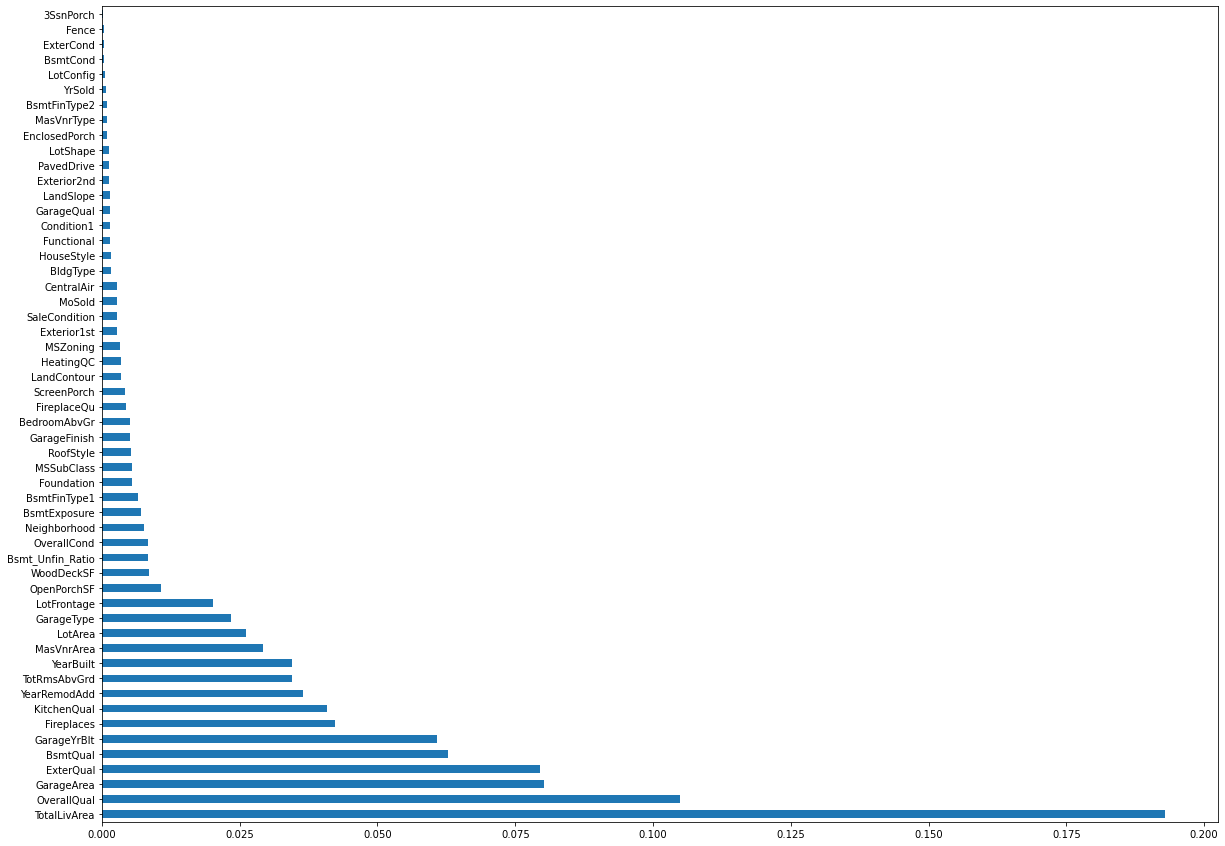

In [19]:
importantfeats.plot.barh(figsize = (20, 15))
